In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_elo = pd.read_csv("../dataset/elo_club_confirmed.csv")
df_trans = pd.read_csv("../dataset/transfer_value_confirmed.csv")
df_capacity = pd.read_csv("../dataset/team_max_capacity.csv")

In [17]:
df_trans = df_trans.rename(columns={"team": "club"})
df_capacity = df_capacity.rename(columns={"team": "club"})

df_merge = pd.merge(df_elo, df_trans, on="club", how="inner")

# 거기에 capacity까지 병합
df_merge = pd.merge(df_merge, df_capacity, on="club", how="inner")

print(df_merge.head())

df_merge.to_csv("final_club_stats.csv", index=False, encoding="utf-8-sig")
df_merge.to_excel("final_club_stats.xlsx", index=False)

          club     elo_sum  rank       sum  순위  max_capacity
0    Barcelona  1163314.68     1  230412.5   6         99354
1  Real Madrid  1160179.20     2  200725.0  10         85454
2      Chelsea  1114090.14     5  391000.0   1         41631
3    Liverpool  1111031.43     6  161900.0  15         53394
4      Arsenal  1109666.85     7  205952.5   8         59867


## 데이터 병합 전 변수별 상위권 클럽 시각화

초기에는 Elo 점수(`elo_sum`), 선수단 몸값(`sum`), 경기장 관중수(`max_capacity`) 데이터를 클럽명을 기준으로 병합하여 분석을 시도했습니다.  
그러나 클럽명 표기 방식의 차이로 인해 병합 후 행 수가 급감하며, 데이터 누락 문제가 발생하였습니다.

따라서 데이터 병합 전에 각 변수별로 클럽의 순위를 개별적으로 확인하고, **토트넘(Tottenham)** 이 각 지표에서 상위권에 위치해 있는지를 시각화하여 확인하는 과정을 거쳤습니다.

---

###  Elo 점수 기반 상위 20개 클럽

- Elo 점수를 기준으로 전체 클럽을 내림차순 정렬하고 상위 20개 클럽을 추출하였습니다.
- 토트넘이 포함되어 있는지 여부를 구분하여 시각적으로 강조하였습니다.

> 🔹 **Elo 점수**는 클럽의 경기력(전력)을 종합적으로 나타내는 연속형 지표입니다.

![Elo 상위 클럽 그래프 예시](your_elo_plot.png)

---

### 선수단 몸값 기준 상위 20개 클럽

- `transfer_value_confirmed.csv` 파일의 `sum`를 기준으로 전체 클럽을 정렬하였습니다.
- 상위 20개 클럽을 대상으로 토트넘의 위치를 강조하여 막대 그래프로 시각화하였습니다.

> 🔹 **squad_value**는 각 팀 선수단의 전체 시장가치로, 팀의 자본력과 선수층 수준을 반영합니다.

![Transfer 상위 클럽 그래프 예시](your_transfer_plot.png)

---

이러한 시각화는 병합된 데이터셋에 의존하지 않고 개별 원천 데이터의 **정확한 비교 및 상위권 여부 판단**을 가능하게 해주며,  
추후 병합 최적화 전에도 유의미한 해석을 도출하는 데 유용합니다.


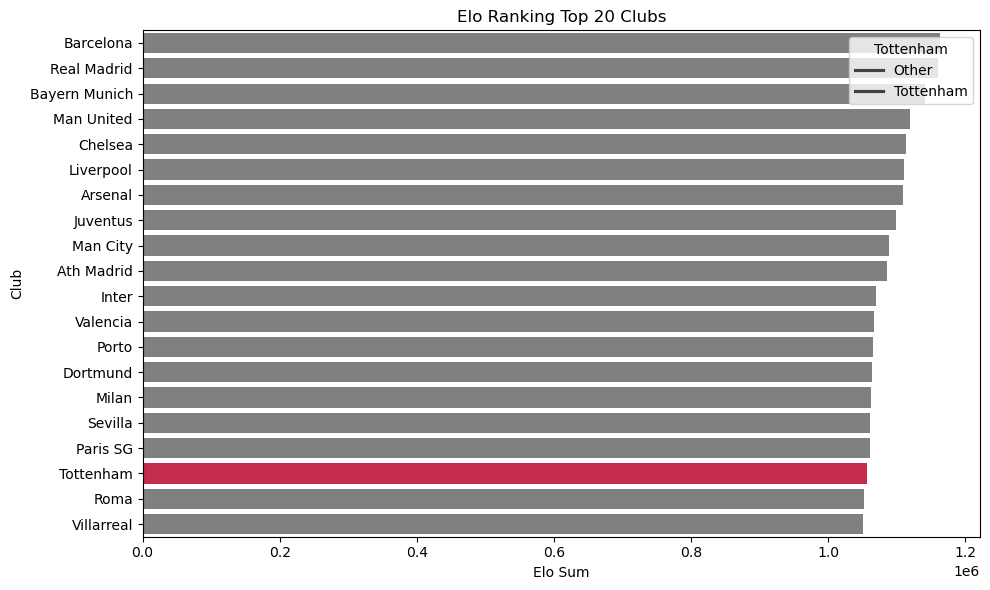

In [12]:
df_elo_top = df_elo.sort_values("elo_sum", ascending=False).head(20)

# 3) 토트넘이 상위에 있으면 강조 색
df_elo_top["highlight"] = df_elo_top["club"].apply(lambda x: "Tottenham" in x)

# 4) 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_elo_top, x="elo_sum", y="club", hue="highlight", dodge=False, palette={True: "crimson", False: "gray"})
plt.title("Elo Ranking Top 20 Clubs")
plt.xlabel("Elo Sum")
plt.ylabel("Club")
plt.legend(title="Tottenham", labels=["Other", "Tottenham"])
plt.tight_layout()
plt.show()


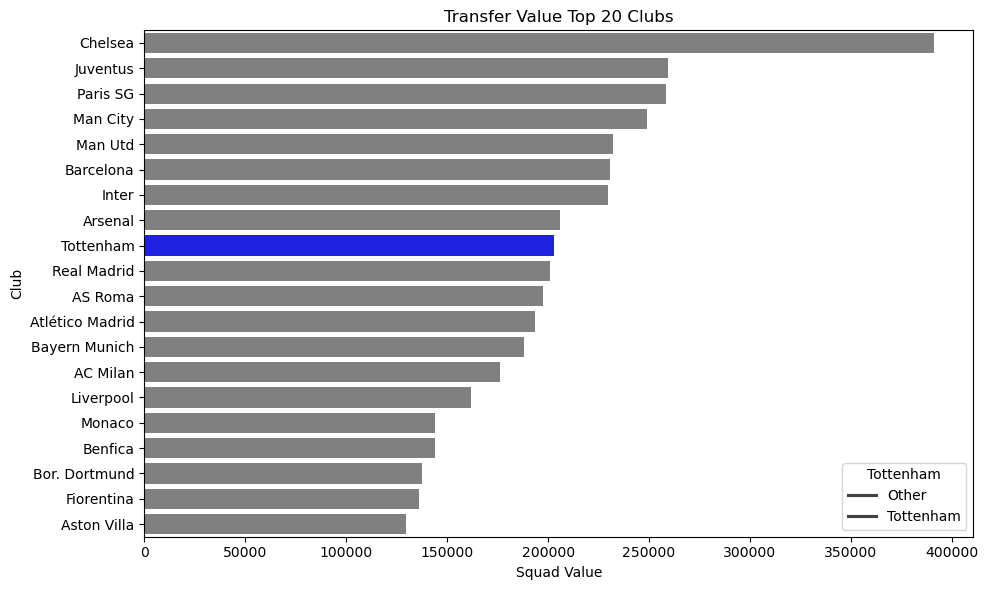

In [14]:
df_trans = pd.read_csv("../dataset/transfer_value_confirmed.csv")

# 2) 상위 20개 클럽 정렬
df_trans_top = df_trans.sort_values("sum", ascending=False).head(20)

# 3) 토트넘 강조
df_trans_top["highlight"] = df_trans_top["club"].apply(lambda x: "Tottenham" in x)

# 4) 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_trans_top, x="sum", y="club", hue="highlight", dodge=False, palette={True: "blue", False: "gray"})
plt.title("Transfer Value Top 20 Clubs")
plt.xlabel("Squad Value")
plt.ylabel("Club")
plt.legend(title="Tottenham", labels=["Other", "Tottenham"])
plt.tight_layout()
plt.show()

In [18]:
#이상값 제거 

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

In [19]:
num_cols = ['elo_sum', 'sum', 'max_capacity']

# 복사 후 제거 반복
df_filtered = df_merge.copy()
for col in num_cols:
    df_filtered = remove_outliers_iqr(df_filtered, col)

print(f"이상값 제거 후 행 개수: {len(df_filtered)}")


이상값 제거 후 행 개수: 99


/var/folders/vk/04vgyt4s7w58b10wq4bkrvg80000gn/T/ipykernel_96194/1114316088.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='value', data=df_plot, palette=['gray', 'skyblue'])


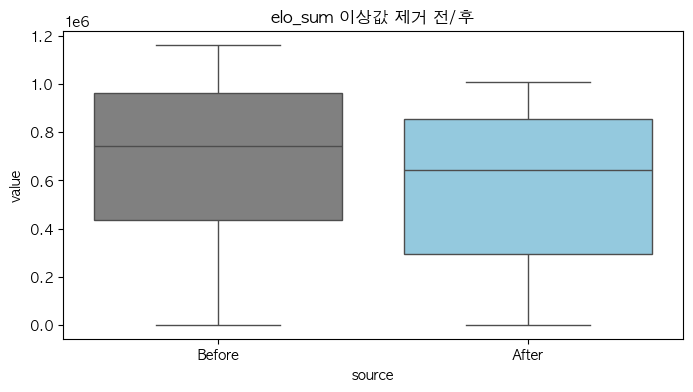

/var/folders/vk/04vgyt4s7w58b10wq4bkrvg80000gn/T/ipykernel_96194/1114316088.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='value', data=df_plot, palette=['gray', 'skyblue'])


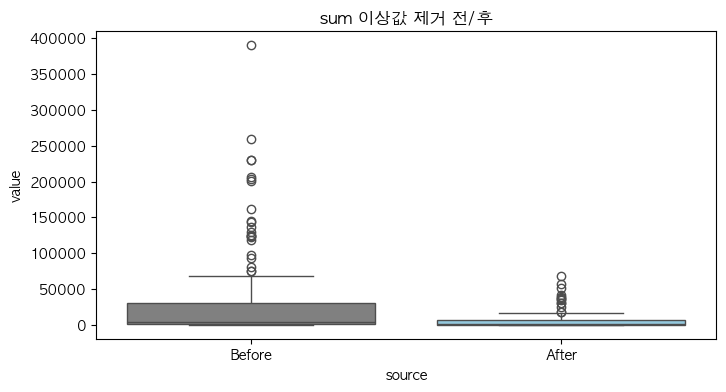

/var/folders/vk/04vgyt4s7w58b10wq4bkrvg80000gn/T/ipykernel_96194/1114316088.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='value', data=df_plot, palette=['gray', 'skyblue'])


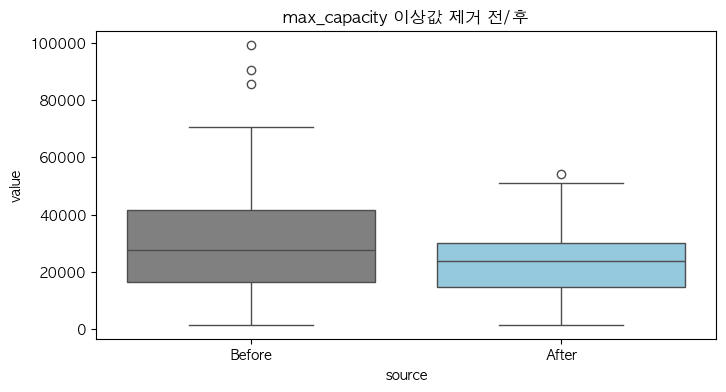

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1) 맥북에서 애플 기본 폰트 사용
plt.rcParams['font.family'] = 'AppleGothic'

# 2) 마이너 경고 제거 (음수 깨짐 방지용)
plt.rcParams['axes.unicode_minus'] = False

for col in num_cols:
    plt.figure(figsize=(8, 4))
    df_plot = pd.DataFrame({
        'value': pd.concat([df_merge[col], df_filtered[col]], ignore_index=True),
        'source': ['Before'] * len(df_merge) + ['After'] * len(df_filtered)
    })
    sns.boxplot(x='source', y='value', data=df_plot, palette=['gray', 'skyblue'])
    plt.title(f'{col} 이상값 제거 전/후')
    plt.show()
